# IMDb Worldwide Gross Prediction - EDA and Regression

#### By: Mada Abudahish & Afnan Alsirhani

- Our goal for this project is to predict the Revenue of the movie.

## Data Description

After we obtained the datasets by scraping two websites: IMDb and the Number, these are the features used:

- **Title**: Name of movie.
- **Budget**:is a financial plan that lists the number of units to be manufactured during a period.
- **Domestic Revenue**:  "Domestic" refers to gross box-office revenue from North America (U.S., Canada, and Puerto Rico), unless otherwise noted. "International" covers the rest of the world.
- **worldwide Revenue**: The global Revenue
- **Genre**:Type of movie
- **Runtime**:Duration per minutes
- **MPAA**: Another type of movie
- **IMDB Rating**:Score of the movie giving by IMDb 
- **Actor Score**: Number of stars participate in movie.
- **Release Data**: is a fixed date on which a product is due to become available for the public to see or buy

In [95]:
# Importing Libraries
#importing all important packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime , date

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn import metrics,preprocessing
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso, Ridge, ElasticNet,RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, BaggingClassifier,
                                RandomForestClassifier, AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [96]:
imdb_data = pd.read_csv('full_data.csv') 

# Exploring the Dataset

In [97]:
imdb_data.head()

Unnamed: 0 Release Date           Title  Production Budget  Domestic Gross  \
0           0   2010-11-24         TANGLED          260000000       200821936   
1           1   2012-05-04    THE AVENGERS          225000000       623279547   
2           2   2012-05-25  MEN IN BLACK 3          215000000       179020854   
3           3   2010-05-14      ROBIN HOOD          210000000       105269730   
4           4   2010-05-14      ROBIN HOOD          210000000       105269730   

   Worldwide Gross      Genre  Runtime_x   MPAA  \
0        586581936  Adventure        101     PG   
1       1519479547     Action        143  PG-13   
2        654213485  Adventure        104  PG-13   
3        322241588     Action        139  PG-13   
4        322241588     Action        139  PG-13   

                                       Critic Rating  ... History  Horror  \
0  [Critics\n89% - Certified Fresh, Audience\n87%...  ...       0       0   
1  [Critics\n92% - Certified Fresh, Audience\n91%...  ...       0       0   
2    [Critics\n68% - Fresh, Audience\n70% - Upright]  ...       0       0   
3   [Critics\n43% - Rotten, Audience\n58% - Spilled]  ...       0       0   
4   [Critics\n43% - Rotten, Audience\n58% - Spilled]  ...       0       0   

   Music  Mystery  Romance SciFi  Sport  Thriller  War  Western  
0      0        0        0     0      0         0    0        0  
1      0        0        0     0      0         0    0        0  
2      0        0        0     0      0         0    0        0  
3      0        0        0     0      0         0    0        0  
4      0        0        0     0      0         0    0        0  

[5 rows x 51 columns]

In [98]:
#Checking info about dataframe
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1532 non-null   int64  
 1   Release Date        1532 non-null   object 
 2   Title               1532 non-null   object 
 3   Production Budget   1532 non-null   int64  
 4   Domestic Gross      1532 non-null   int64  
 5   Worldwide Gross     1532 non-null   int64  
 6   Genre               1532 non-null   object 
 7   Runtime_x           1532 non-null   int64  
 8   MPAA                1532 non-null   object 
 9   Critic Rating       1532 non-null   object 
 10  Weekend 1 Rank      1532 non-null   object 
 11  Weekend 1 Gross     1532 non-null   int64  
 12  Weekend 1 Theaters  1532 non-null   int64  
 13  Weekend 1 GPT       1532 non-null   int64  
 14  Weekend 1 TG        1532 non-null   int64  
 15  Weekend 2 Rank      1532 non-null   object 
 16  Weeken

In [99]:
#Checking DataFrame size

imdb_data.shape

(1532, 51)

In [100]:
#Checking descriptive statistics for numerical columns.

imdb_data.describe()

Unnamed: 0  Production Budget  Domestic Gross  Worldwide Gross  \
count  1532.00000       1.532000e+03    1.532000e+03     1.532000e+03   
mean    765.50000       3.895161e+07    5.817085e+07     1.168937e+08   
std     442.39462       3.847997e+07    6.708750e+07     1.658428e+08   
min       0.00000       2.500000e+04    1.348600e+04     1.348600e+04   
25%     382.75000       1.200000e+07    1.339594e+07     1.829547e+07   
50%     765.50000       2.600000e+07    3.601421e+07     5.522120e+07   
75%    1148.25000       5.200000e+07    7.936888e+07     1.499176e+08   
max    1531.00000       2.600000e+08    6.232795e+08     1.519480e+09   

         Runtime_x  Weekend 1 Gross  Weekend 1 Theaters  Weekend 1 GPT  \
count  1532.000000     1.532000e+03         1532.000000    1532.000000   
mean     59.034595     1.493443e+07         2061.088773   10097.688642   
std      51.853328     1.838392e+07         1258.899248   19807.069054   
min       0.000000     5.310000e+02            1.000000     531.000000   
25%       0.000000     3.254246e+06         1138.750000    3629.750000   
50%      89.000000     9.880536e+06         2397.000000    5882.000000   
75%     103.000000     1.970912e+07         3037.750000   10370.750000   
max     165.000000     2.074387e+08         4370.000000  393095.000000   

       Weekend 1 TG  Weekend 2 Gross  ...      History       Horror  \
count  1.532000e+03     1.532000e+03  ...  1532.000000  1532.000000   
mean   1.568452e+07     8.898018e+06  ...     0.001958     0.028068   
std    1.923708e+07     1.027173e+07  ...     0.044223     0.165221   
min    3.526000e+03     2.554000e+03  ...     0.000000     0.000000   
25%    3.389995e+06     1.923702e+06  ...     0.000000     0.000000   
50%    1.012687e+07     6.026227e+06  ...     0.000000     0.000000   
75%    2.024294e+07     1.200490e+07  ...     0.000000     0.000000   
max    2.074387e+08     1.030523e+08  ...     1.000000     1.000000   

             Music      Mystery      Romance   SciFi        Sport    Thriller  \
count  1532.000000  1532.000000  1532.000000  1532.0  1532.000000  1532.00000   
mean      0.045039     0.009138     0.244125     0.0     0.020888     0.01436   
std       0.207458     0.095188     0.429708     0.0     0.143055     0.11901   
min       0.000000     0.000000     0.000000     0.0     0.000000     0.00000   
25%       0.000000     0.000000     0.000000     0.0     0.000000     0.00000   
50%       0.000000     0.000000     0.000000     0.0     0.000000     0.00000   
75%       0.000000     0.000000     0.000000     0.0     0.000000     0.00000   
max       1.000000     1.000000     1.000000     0.0     1.000000     1.00000   

               War      Western  
count  1532.000000  1532.000000  
mean      0.004569     0.001305  
std       0.067463     0.036120  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 43 columns]

In [101]:
# Checking columns names

imdb_data.columns

Index(['Unnamed: 0', 'Release Date', 'Title', 'Production Budget',
       'Domestic Gross', 'Worldwide Gross', 'Genre', 'Runtime_x', 'MPAA',
       'Critic Rating', 'Weekend 1 Rank', 'Weekend 1 Gross',
       'Weekend 1 Theaters', 'Weekend 1 GPT', 'Weekend 1 TG', 'Weekend 2 Rank',
       'Weekend 2 Gross', 'Weekend 2 Change', 'Weekend 2 Theaters',
       'Weekend 2 GPT', 'Weekend 2 TG', 'Weekend 3 Rank', 'Weekend 3 Gross',
       'Weekend 3 Change', 'Weekend 3 Theaters', 'Weekend 3 GPT',
       'Weekend 3 TG', 'IMDB Rating', 'MPAA Rating', 'Budget', 'Runtime_y',
       'Actor Score', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

# Clean Data

- Remove whitespace.
- Drop duplicates.
- Check null.
- Remove Unnecessary columns.
- Rename columns.
- Remove outlire

In [102]:
# Remove spaces at columns names

imdb_data.columns = imdb_data.columns.str.strip()
imdb_data.columns

Index(['Unnamed: 0', 'Release Date', 'Title', 'Production Budget',
       'Domestic Gross', 'Worldwide Gross', 'Genre', 'Runtime_x', 'MPAA',
       'Critic Rating', 'Weekend 1 Rank', 'Weekend 1 Gross',
       'Weekend 1 Theaters', 'Weekend 1 GPT', 'Weekend 1 TG', 'Weekend 2 Rank',
       'Weekend 2 Gross', 'Weekend 2 Change', 'Weekend 2 Theaters',
       'Weekend 2 GPT', 'Weekend 2 TG', 'Weekend 3 Rank', 'Weekend 3 Gross',
       'Weekend 3 Change', 'Weekend 3 Theaters', 'Weekend 3 GPT',
       'Weekend 3 TG', 'IMDB Rating', 'MPAA Rating', 'Budget', 'Runtime_y',
       'Actor Score', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'SciFi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [103]:
#Checking null values 

imdb_data.isnull().sum()

Unnamed: 0               0
Release Date             0
Title                    0
Production Budget        0
Domestic Gross           0
Worldwide Gross          0
Genre                    0
Runtime_x                0
MPAA                     0
Critic Rating            0
Weekend 1 Rank           0
Weekend 1 Gross          0
Weekend 1 Theaters       0
Weekend 1 GPT            0
Weekend 1 TG             0
Weekend 2 Rank           0
Weekend 2 Gross          0
Weekend 2 Change         0
Weekend 2 Theaters       0
Weekend 2 GPT            0
Weekend 2 TG             0
Weekend 3 Rank           0
Weekend 3 Gross          0
Weekend 3 Change         0
Weekend 3 Theaters       0
Weekend 3 GPT            0
Weekend 3 TG             0
IMDB Rating             20
MPAA Rating             43
Budget                1125
Runtime_y               26
Actor Score              0
Action                   0
Adventure                0
Animation                0
Biography                0
Comedy                   0
C

In [104]:
#Checking duplicates rows and drop.
imdb_data.drop_duplicates(subset=["Title"], keep="first", inplace=True)

In [105]:
#check
imdb_data.shape

(1400, 51)

## Features Engineering:

##### Dummy Variables

In [106]:
#pd.get_dummies(imdb_data1['Genre'], drop_first=True).head(5)

#### Deal with Date:

In [107]:
#Deal with Date:
imdb_data['Release_Date'] = pd.to_datetime(imdb_data['Release Date'])

In [108]:
date.today()
imdb_data['Today'] = pd.to_datetime(date.today())

In [109]:
imdb_data['Release_Date']

0      2010-11-24
1      2012-05-04
2      2012-05-25
3      2010-05-14
5      2016-06-17
          ...    
1527   1995-08-09
1528   2001-03-16
1529   2010-11-12
1530   1994-10-19
1531   1997-08-01
Name: Release_Date, Length: 1400, dtype: datetime64[ns]

In [110]:
imdb_data['movie_age_updated']=imdb_data['Today']-imdb_data['Release_Date']

In [111]:
imdb_data['movie_age_updated']

0      3987 days
1      3460 days
2      3439 days
3      4181 days
5      1955 days
          ...   
1527   9573 days
1528   7527 days
1529   3999 days
1530   9867 days
1531   8850 days
Name: movie_age_updated, Length: 1400, dtype: timedelta64[ns]

In [112]:

imdb_data['movie_age_updated']=imdb_data['movie_age_updated'].astype('timedelta64[D]')

In [113]:
imdb_data['movie_age']=imdb_data['movie_age_updated']/365

In [114]:
imdb_data['movie_age'] =imdb_data['movie_age'].astype(int)

In [115]:
imdb_data['movie_age']

0       10
1        9
2        9
3       11
5        5
        ..
1527    26
1528    20
1529    10
1530    27
1531    24
Name: movie_age, Length: 1400, dtype: int32

In [116]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1531
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1400 non-null   int64         
 1   Release Date        1400 non-null   object        
 2   Title               1400 non-null   object        
 3   Production Budget   1400 non-null   int64         
 4   Domestic Gross      1400 non-null   int64         
 5   Worldwide Gross     1400 non-null   int64         
 6   Genre               1400 non-null   object        
 7   Runtime_x           1400 non-null   int64         
 8   MPAA                1400 non-null   object        
 9   Critic Rating       1400 non-null   object        
 10  Weekend 1 Rank      1400 non-null   object        
 11  Weekend 1 Gross     1400 non-null   int64         
 12  Weekend 1 Theaters  1400 non-null   int64         
 13  Weekend 1 GPT       1400 non-null   int64       

In [117]:
# trying to find most common genres in data set to isolate these as one feature
print(imdb_data['Action'].value_counts())
print(imdb_data['Adventure'].value_counts())
print(imdb_data['Animation'].value_counts())
print(imdb_data['Biography'].value_counts())
print(imdb_data['Crime'].value_counts())
print(imdb_data['Drama'].value_counts())
print(imdb_data['Family'].value_counts())
print(imdb_data['Fantasy'].value_counts())
print(imdb_data['History'].value_counts())
print(imdb_data['Horror'].value_counts())
print(imdb_data['Music'].value_counts())
print(imdb_data['Mystery'].value_counts())
print(imdb_data['Romance'].value_counts())
print(imdb_data['Sport'].value_counts())
print(imdb_data['Thriller'].value_counts())

0    1190
1     210
Name: Action, dtype: int64
0    1079
1     321
Name: Adventure, dtype: int64
0    1248
1     152
Name: Animation, dtype: int64
0    1372
1      28
Name: Biography, dtype: int64
0    1210
1     190
Name: Crime, dtype: int64
0    892
1    508
Name: Drama, dtype: int64
0    1263
1     137
Name: Family, dtype: int64
0    1301
1      99
Name: Fantasy, dtype: int64
0    1397
1       3
Name: History, dtype: int64
0    1362
1      38
Name: Horror, dtype: int64
0    1338
1      62
Name: Music, dtype: int64
0    1386
1      14
Name: Mystery, dtype: int64
0    1052
1     348
Name: Romance, dtype: int64
0    1370
1      30
Name: Sport, dtype: int64
0    1379
1      21
Name: Thriller, dtype: int64


In [118]:
# Top categories (7 given)
imdb_data['Top_Genres'] = imdb_data['Action'] + imdb_data['Adventure'] + imdb_data['Animation'] + imdb_data['Crime'] + imdb_data['Drama']+ imdb_data['Family']+ imdb_data['Romance']

#

In [119]:
imdb_data.head(1)

Unnamed: 0 Release Date    Title  Production Budget  Domestic Gross  \
0           0   2010-11-24  TANGLED          260000000       200821936   

   Worldwide Gross      Genre  Runtime_x MPAA  \
0        586581936  Adventure        101   PG   

                                       Critic Rating  ... SciFi  Sport  \
0  [Critics\n89% - Certified Fresh, Audience\n87%...  ...     0      0   

   Thriller  War  Western Release_Date      Today  movie_age_updated  \
0         0    0        0   2010-11-24 2021-10-24             3987.0   

   movie_age  Top_Genres  
0         10           2  

[1 rows x 56 columns]

**There are a lot of variables, many of which have a lot of missing values. Let's pick out just a few columns and start building models using that.**

In [120]:
#Use necessary columns 
imdb_data1 =  imdb_data[['Release Date','Title','Production Budget','Domestic Gross',
                         'Worldwide Gross','Runtime_x','Genre','IMDB Rating','MPAA Rating',
                         'Actor Score','Top_Genres']]

In [121]:
#Use necessary columns 
imdb_data2 =  imdb_data[['Release Date','Title','Production Budget','Domestic Gross','Worldwide Gross',
          'Runtime_x','IMDB Rating','MPAA Rating','Actor Score','Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','History','Horror',
      'Music','Mystery','Romance','Sport','Thriller','War','Western','Today','movie_age_updated','movie_age']]


In [122]:
#Use necessary columns 
imdb_data3 =  imdb_data[['Release Date','Title','Production Budget','Domestic Gross','Worldwide Gross',
          'Runtime_x','IMDB Rating','MPAA Rating','Actor Score','Action','Adventure','Animation',
                         'Crime','Drama','Family','Romance','movie_age']]


In [123]:
imdb_data2

Release Date                  Title  Production Budget  Domestic Gross  \
0      2010-11-24                TANGLED          260000000       200821936   
1      2012-05-04           THE AVENGERS          225000000       623279547   
2      2012-05-25         MEN IN BLACK 3          215000000       179020854   
3      2010-05-14             ROBIN HOOD          210000000       105269730   
5      2016-06-17           FINDING DORY          200000000       484413156   
...           ...                    ...                ...             ...   
1527   1995-08-09  THE BROTHERS MCMULLEN              50000        10426506   
1528   2001-03-16               GABRIELA              50000         2335352   
1529   2010-11-12         TINY FURNITURE              50000          391674   
1530   1994-10-19                 CLERKS              27000         3073428   
1531   1997-08-01  IN THE COMPANY OF MEN              25000         2883661   

      Worldwide Gross  Runtime_x  IMDB Rating MPAA Rating  Actor Score  \
0           586581936        101          7.7          PG            0   
1          1519479547        143          8.3       TV-14            0   
2           654213485        104          6.8       PG-13            3   
3           322241588        139          7.6           G            0   
5           985213156        103          7.3          PG            2   
...               ...        ...          ...         ...          ...   
1527         10426506          0          6.6           R            1   
1528          2335352          0          6.3           R            0   
1529           424149         99          6.2   Not Rated            0   
1530          3894240          0          7.7           R            0   
1531          2883661          0          7.2           R            1   

      Action  ...  Music  Mystery  Romance  Sport  Thriller  War  Western  \
0          0  ...      0        0        0      0         0    0        0   
1          1  ...      0        0        0      0         0    0        0   
2          1  ...      0        0        0      0         0    0        0   
3          0  ...      0        0        0      0         0    0        0   
5          0  ...      0        0        0      0         0    0        0   
...      ...  ...    ...      ...      ...    ...       ...  ...      ...   
1527       0  ...      0        0        1      0         0    0        0   
1528       0  ...      0        0        1      0         0    0        0   
1529       0  ...      0        0        1      0         0    0        0   
1530       0  ...      0        0        0      0         0    0        0   
1531       0  ...      0        0        0      0         0    0        0   

          Today  movie_age_updated  movie_age  
0    2021-10-24             3987.0         10  
1    2021-10-24             3460.0          9  
2    2021-10-24             3439.0          9  
3    2021-10-24             4181.0         11  
5    2021-10-24             1955.0          5  
...         ...                ...        ...  
1527 2021-10-24             9573.0         26  
1528 2021-10-24             7527.0         20  
1529 2021-10-24             3999.0         10  
1530 2021-10-24             9867.0         27  
1531 2021-10-24             8850.0         24  

[1400 rows x 30 columns]

In [124]:
#rename columns
imdb_data2.rename(
    inplace=True,
    columns={'Release Date':'Release_Date',
             'Production Budget':'Budget',
             'Domestic Gross':'Domestic_Revenue',
             'Worldwide Gross':'Worldwide_Revenue',
             'Runtime_x':'Runtime',
             'Genre':'Genre',
             'IMDB Rating':'IMDB_Rating',
             'MPAA Rating':'MPAA_Rating',
             'Actor Score':'Actor_Score',
             'Top_Genres':'Top_Genres'
    })


In [125]:
#check
imdb_data2.head(1)

Release_Date    Title     Budget  Domestic_Revenue  Worldwide_Revenue  \
0   2010-11-24  TANGLED  260000000         200821936          586581936   

   Runtime  IMDB_Rating MPAA_Rating  Actor_Score  Action  ...  Music  Mystery  \
0      101          7.7          PG            0       0  ...      0        0   

   Romance  Sport  Thriller  War  Western      Today  movie_age_updated  \
0        0      0         0    0        0 2021-10-24             3987.0   

   movie_age  
0         10  

[1 rows x 30 columns]

In [126]:
#Drop null value from Worldwide_Revenue
imdb_data2.dropna(subset=["Worldwide_Revenue"], inplace=True)

In [127]:
imdb_data2.shape

(1400, 30)

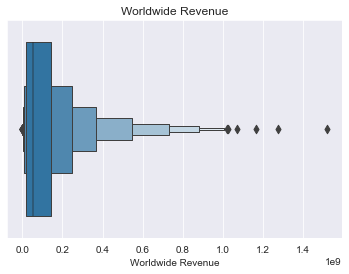

In [128]:
ax = sns.boxenplot(x='Worldwide_Revenue', data=imdb_data2).set(xlabel='Worldwide Revenue',title="Worldwide Revenue")


# Visualization Data

Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

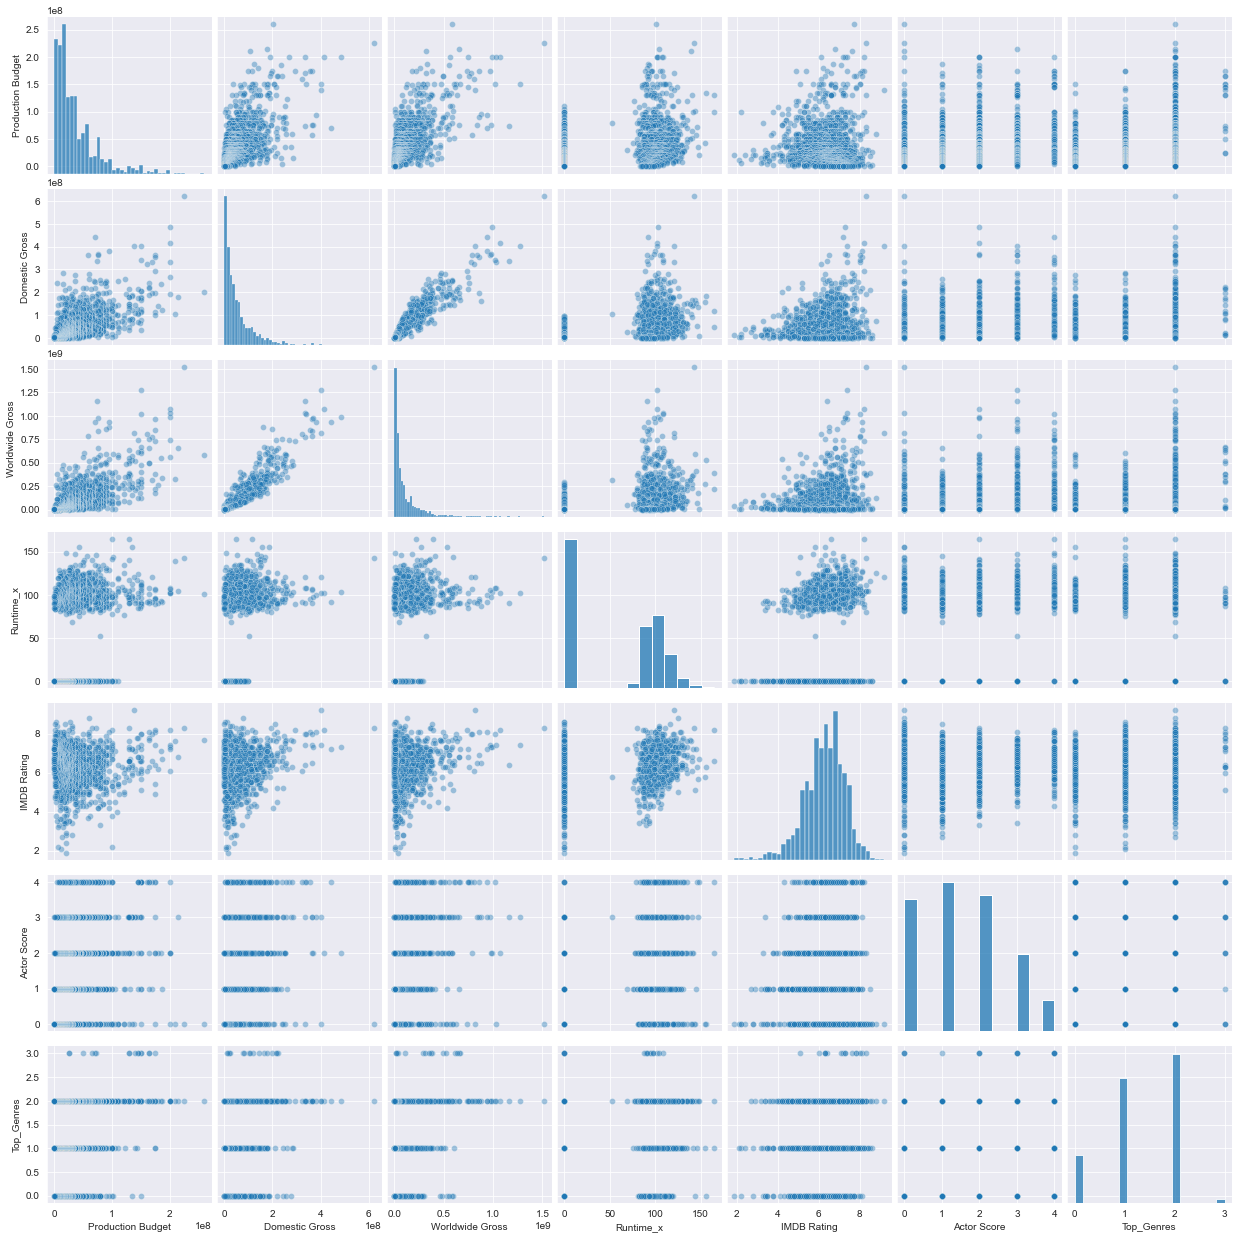

In [129]:
sns.pairplot(imdb_data1[:], plot_kws=dict(alpha=.4))

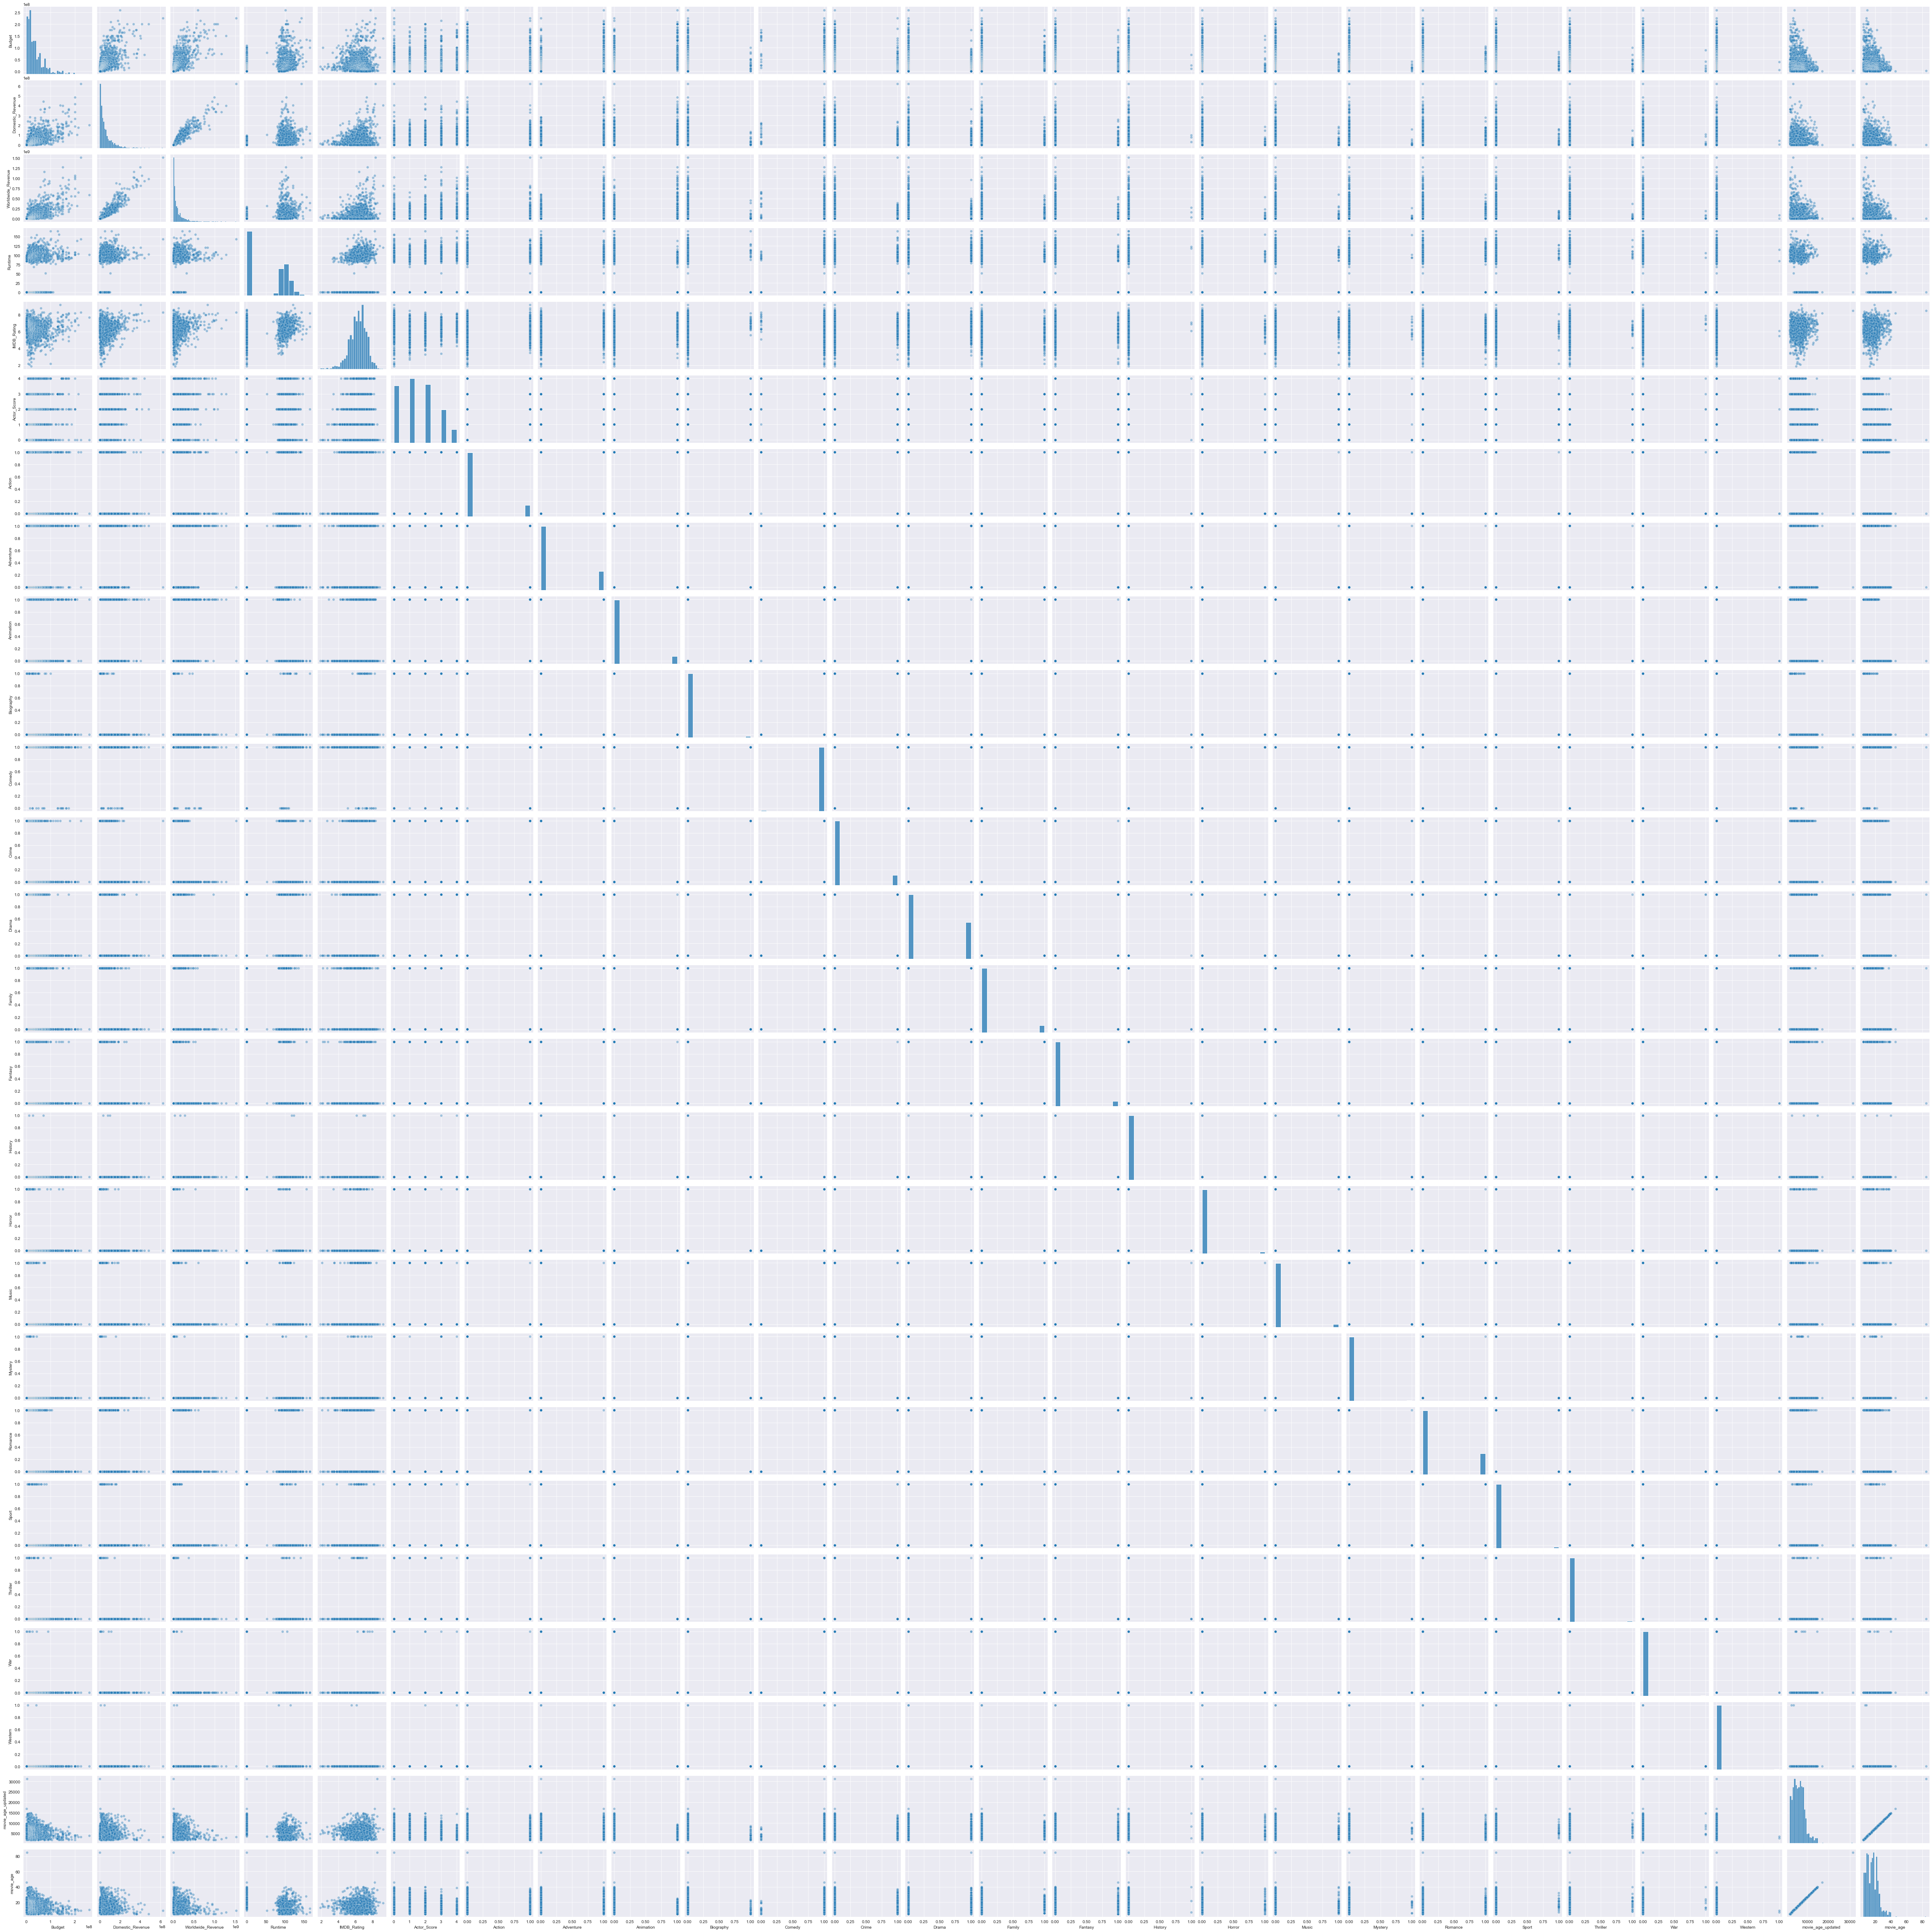

In [130]:
sns.pairplot(imdb_data2[:], plot_kws=dict(alpha=.4))

In [131]:
# initial look at correlations
imdb_data2.corr()

Budget  Domestic_Revenue  Worldwide_Revenue   Runtime  \
Budget             1.000000          0.636200           0.696576  0.371935   
Domestic_Revenue   0.636200          1.000000           0.932081  0.434243   
Worldwide_Revenue  0.696576          0.932081           1.000000  0.409696   
Runtime            0.371935          0.434243           0.409696  1.000000   
IMDB_Rating        0.034547          0.194778           0.210240  0.205407   
Actor_Score        0.318533          0.314892           0.315607  0.374163   
Action             0.210140          0.110397           0.098653  0.052926   
Adventure          0.465818          0.340265           0.401863  0.122570   
Animation          0.480527          0.379374           0.469459  0.119641   
Biography         -0.023381         -0.048248          -0.035232  0.040602   
Comedy            -0.200293         -0.092086          -0.139925 -0.028383   
Crime             -0.042445         -0.033054          -0.057132  0.009873   
Drama             -0.298335         -0.246385          -0.233038 -0.058971   
Family             0.049313          0.032756           0.002852 -0.047436   
Fantasy            0.013160         -0.019205          -0.035740 -0.000572   
History           -0.002153          0.009970           0.012712  0.020443   
Horror            -0.046587         -0.066965          -0.059791 -0.038881   
Music             -0.095355         -0.069673          -0.063174 -0.026959   
Mystery           -0.055904         -0.045388          -0.043529 -0.049703   
Romance           -0.185172         -0.121255          -0.125685 -0.048441   
Sport             -0.024501         -0.006057          -0.038451  0.003577   
Thriller          -0.032647         -0.055319          -0.047212 -0.003463   
War               -0.021162         -0.019819          -0.025087 -0.039345   
Western           -0.014533         -0.018000          -0.014906  0.030638   
movie_age_updated -0.216999         -0.082636          -0.163609 -0.378424   
movie_age         -0.221351         -0.086649          -0.166764 -0.382678   

                   IMDB_Rating  Actor_Score    Action  Adventure  Animation  \
Budget                0.034547     0.318533  0.210140   0.465818   0.480527   
Domestic_Revenue      0.194778     0.314892  0.110397   0.340265   0.379374   
Worldwide_Revenue     0.210240     0.315607  0.098653   0.401863   0.469459   
Runtime               0.205407     0.374163  0.052926   0.122570   0.119641   
IMDB_Rating           1.000000     0.055710 -0.039542   0.005559   0.096807   
Actor_Score           0.055710     1.000000  0.041995   0.100942   0.137097   
Action               -0.039542     0.041995  1.000000   0.218183  -0.030864   
Adventure             0.005559     0.100942  0.218183   1.000000   0.568839   
Animation             0.096807     0.137097 -0.030864   0.568839   1.000000   
Biography             0.101175     0.032348 -0.060012  -0.077919  -0.049856   
Comedy               -0.090641    -0.065934 -0.253916  -0.209238  -0.306635   
Crime                 0.026557     0.048406  0.236554  -0.181406  -0.138292   
Drama                 0.238170    -0.072100 -0.287897  -0.309133  -0.258593   
Family               -0.139832    -0.113414 -0.111425   0.043393  -0.068576   
Fantasy              -0.042144    -0.036792 -0.045650  -0.097433  -0.087314   
History               0.019959     0.033284 -0.019467  -0.025276  -0.016172   
Horror               -0.026924    -0.090034 -0.033237  -0.091106  -0.058293   
Music                 0.001136    -0.037611 -0.080705  -0.109152  -0.075125   
Mystery              -0.000014    -0.022637 -0.022115  -0.037741  -0.035075   
Romance              -0.069133     0.002038 -0.227726  -0.309775  -0.200723   
Sport                -0.015438     0.006476 -0.048350  -0.080713  -0.051643   
Thriller             -0.006926    -0.005499 -0.002469  -0.053330  -0.043067   
War                   0.061592     0.005379 -0.001418  -0.038665  -0.024739   
Western           

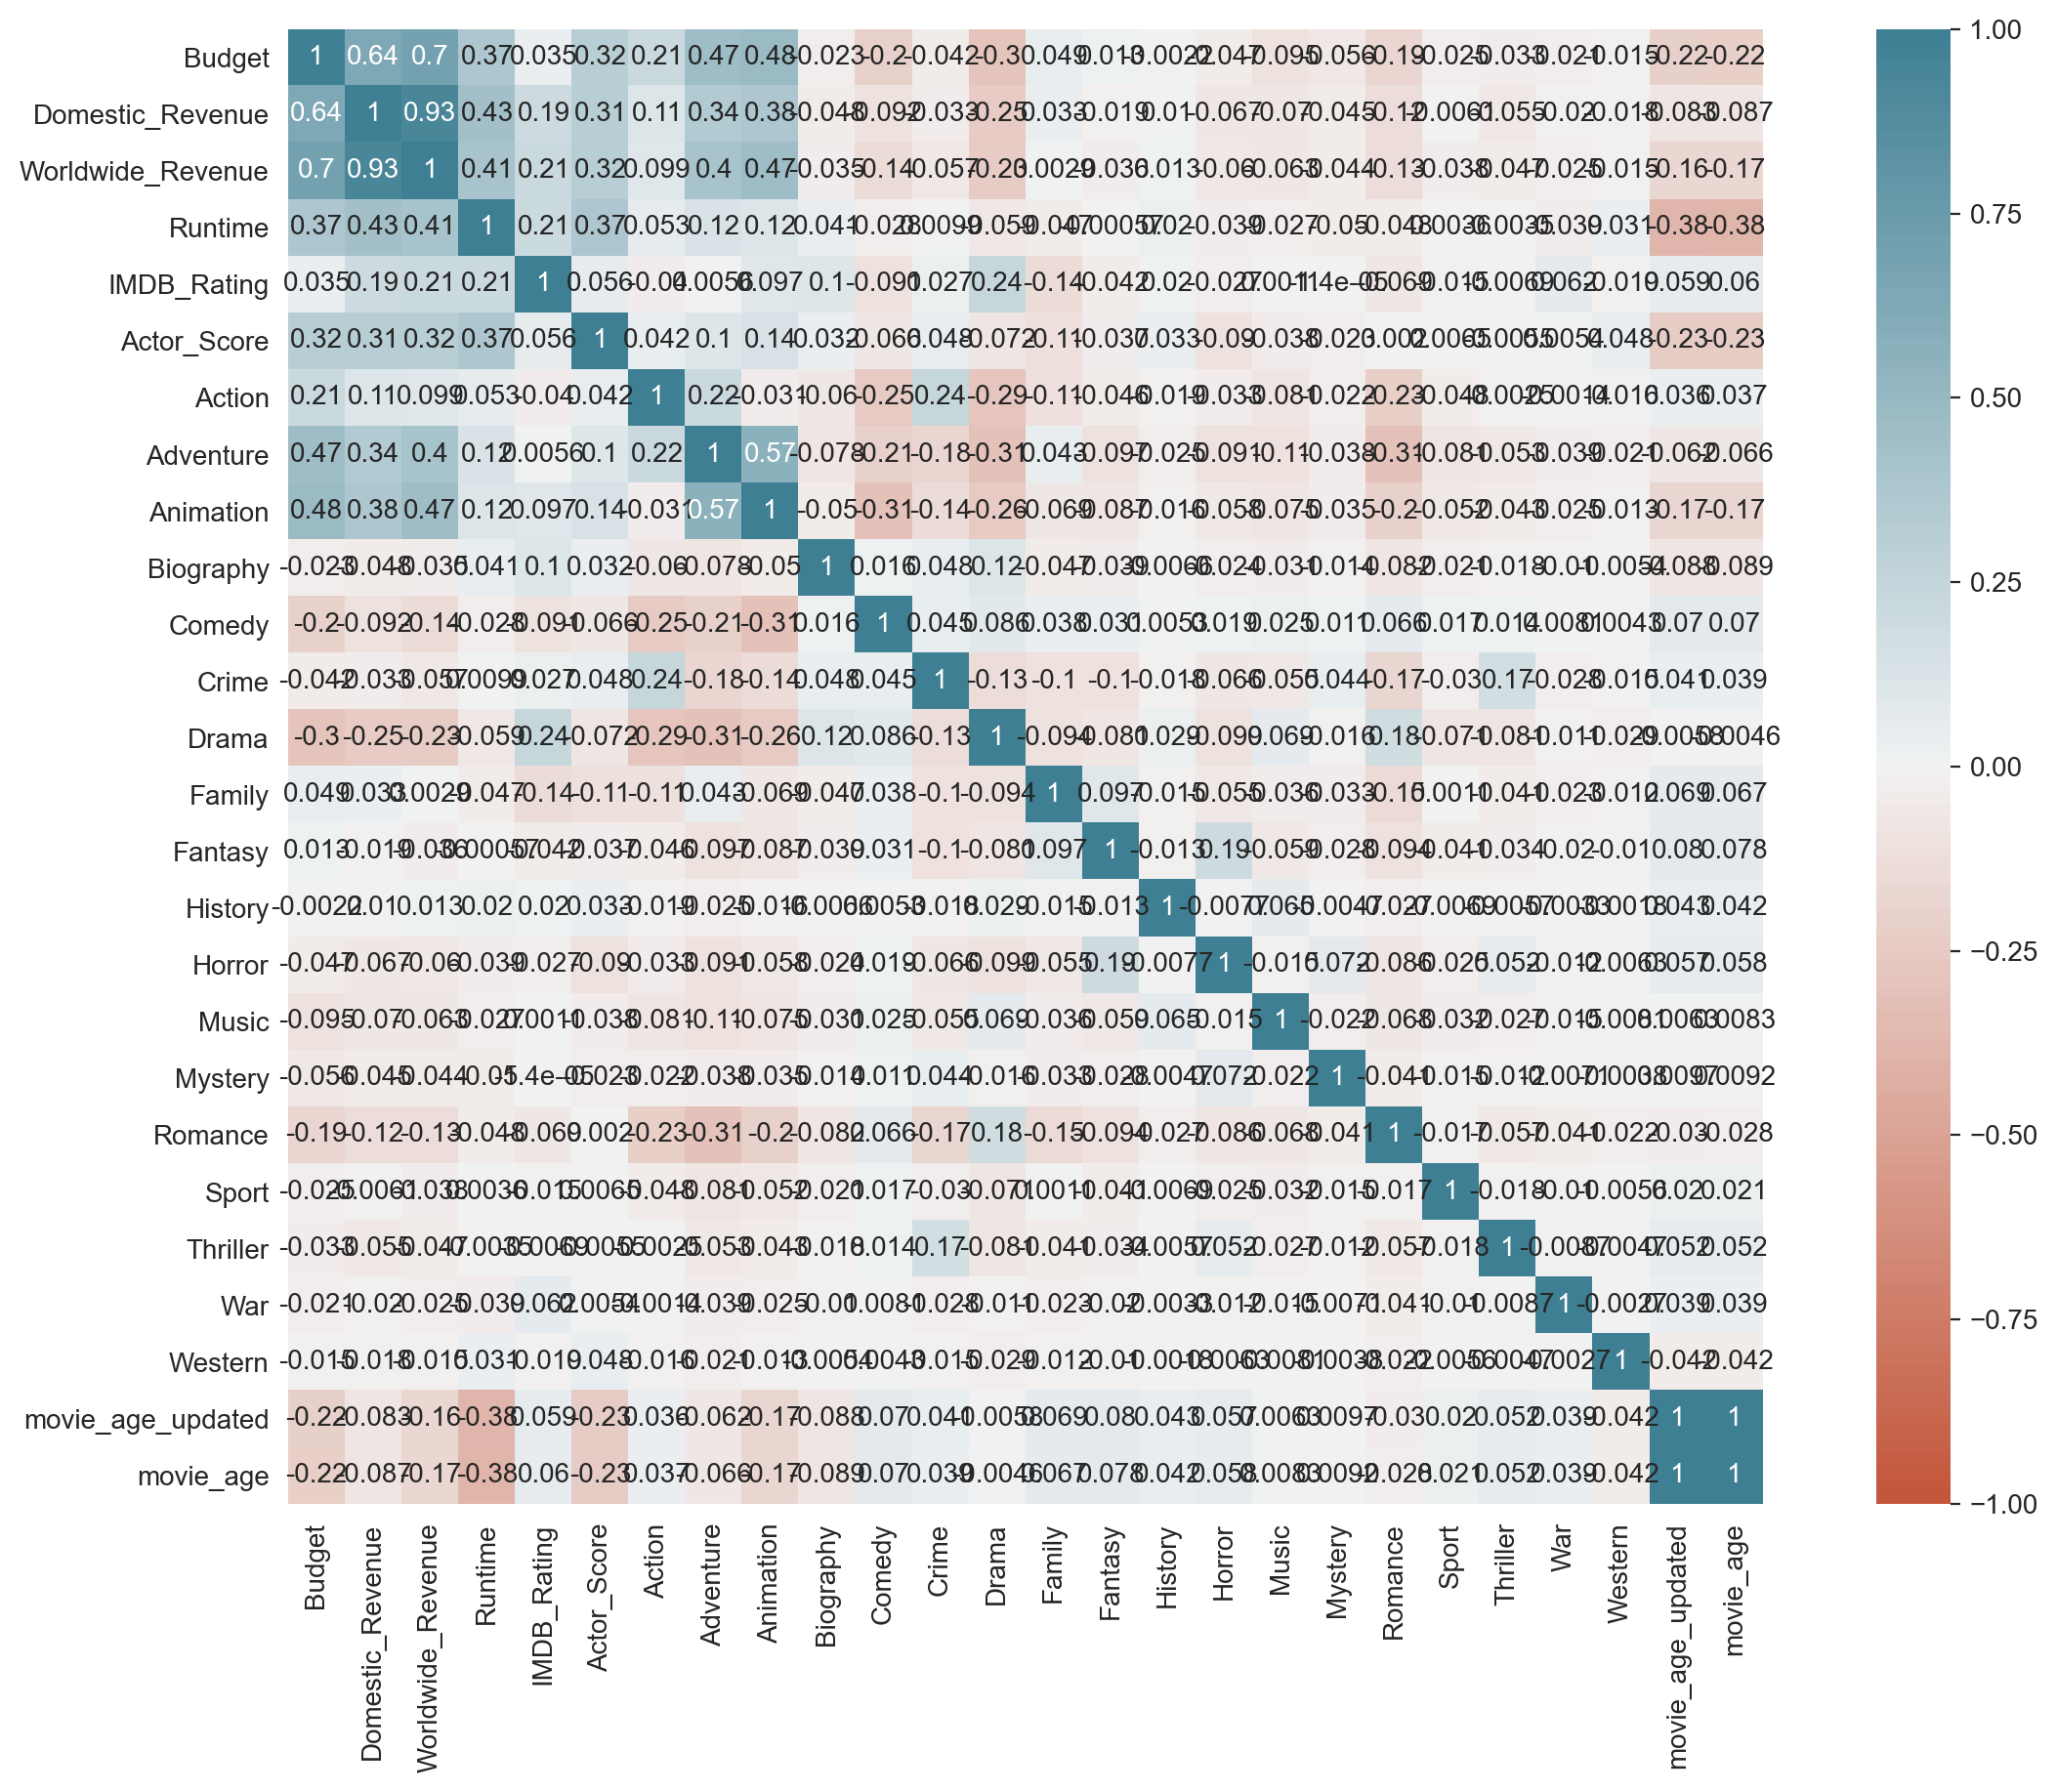

In [132]:
plt.figure(figsize=(15,10),dpi=200),
sns.heatmap(imdb_data2.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),);
plt.savefig("heatmapforIMDB.png")

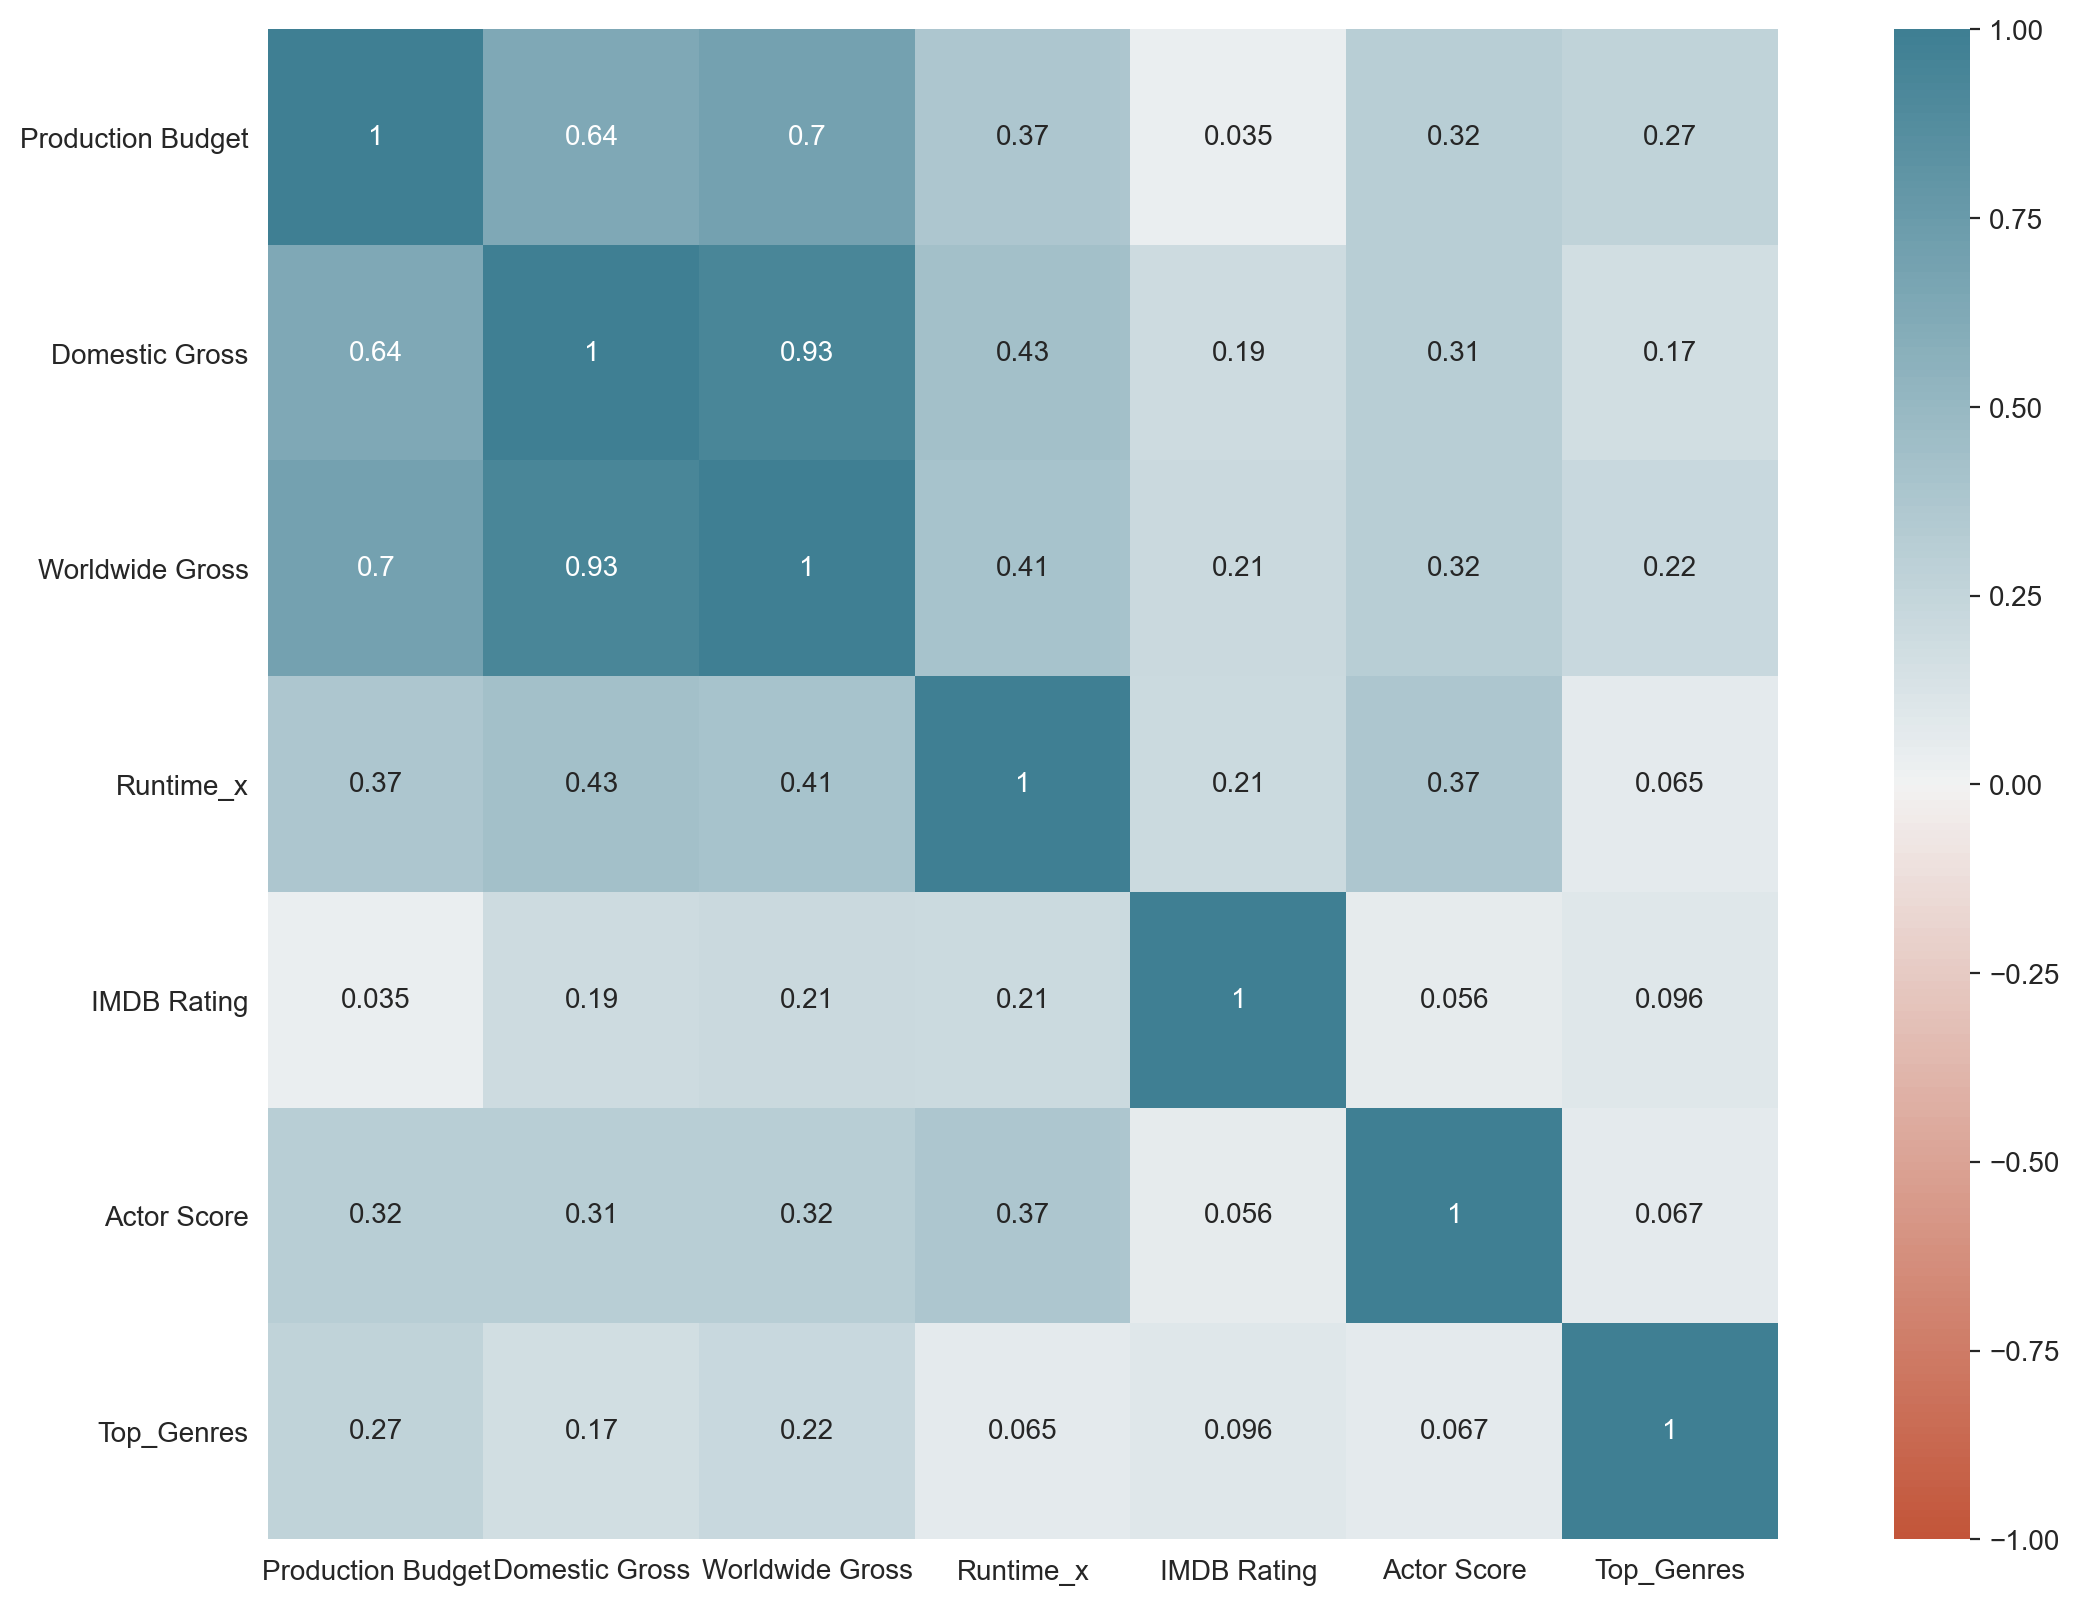

In [133]:
plt.figure(figsize=(15,10),dpi=200),
sns.heatmap(imdb_data1.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),);
plt.savefig("heatmapforIMDB.png")

In [134]:
imdb_data2.head(1)

Release_Date    Title     Budget  Domestic_Revenue  Worldwide_Revenue  \
0   2010-11-24  TANGLED  260000000         200821936          586581936   

   Runtime  IMDB_Rating MPAA_Rating  Actor_Score  Action  ...  Music  Mystery  \
0      101          7.7          PG            0       0  ...      0        0   

   Romance  Sport  Thriller  War  Western      Today  movie_age_updated  \
0        0      0         0    0        0 2021-10-24             3987.0   

   movie_age  
0         10  

[1 rows x 30 columns]

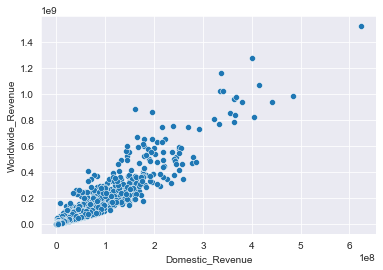

In [135]:
#Domestic_Revenue and Worldwide_Revenue have a logistic relationship
sns.scatterplot(x ='Domestic_Revenue', y='Worldwide_Revenue', data=imdb_data2);

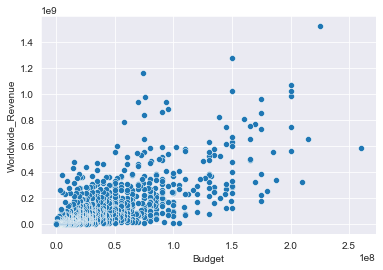

In [136]:
#Domestic_Revenue and Budget have a logistic relationship
sns.scatterplot(x='Budget', y='Worldwide_Revenue', data=imdb_data2);

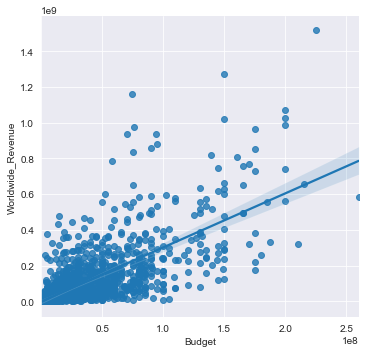

In [137]:
sns.lmplot(x='Budget', y='Worldwide_Revenue', data=imdb_data2 ,palette="Set1" )

In [138]:
##

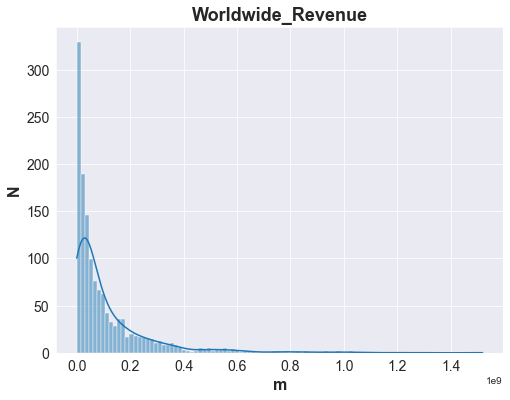

In [139]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))

sns.histplot(data=imdb_data2['Worldwide_Revenue'], bins=100, kde=True)
plt.xlabel('m', size=16, fontweight='bold')
plt.ylabel('N', size=16, fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Worldwide_Revenue', size=18, fontweight='bold');

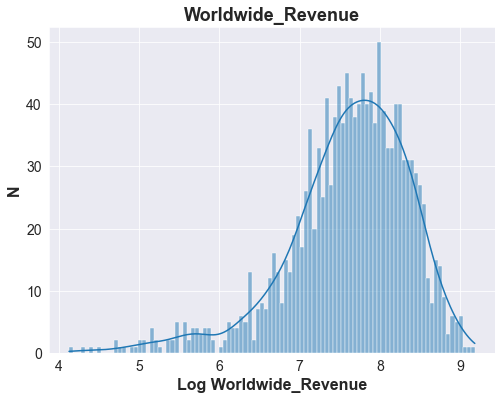

In [140]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))

sns.histplot(data=np.log10(imdb_data2['Worldwide_Revenue']), bins=100, kde=True)
plt.xlabel('Log Worldwide_Revenue', size=16, fontweight='bold')
plt.ylabel('N', size=16, fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Worldwide_Revenue', size=18, fontweight='bold');

# Regression

In [141]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Try with Stats Models

In [142]:
y, X = patsy.dmatrices('Worldwide_Revenue  ~ Budget + Domestic_Revenue+ Runtime + IMDB_Rating + Actor_Score+ Action+Family +Adventure+Animation+Biography+Comedy+Crime+Drama+Fantasy+History+Horror+Music+Mystery+Romance+Sport+Thriller+ War+Western+movie_age',data=imdb_data2, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Worldwide_Revenue   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     526.2
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:38:20   Log-Likelihood:                -26740.
No. Observations:                1395   AIC:                         5.353e+04
Df Residuals:                    1370   BIC:                         5.366e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.848e+07   1.81e+07     -2.125      0.034    -7.4e+07   -2.96e+06
Budget               0.5986      0.056     10.760      0.000       0.489       0.708
Domestic_Revenue     2.0261      0.030     67.526      0.000       1.967       2.085
Runtime          -1.382e+05    3.4e+04     -4.063      0.000   -2.05e+05   -7.15e+04
IMDB_Rating       7.732e+06    1.6e+06      4.840      0.000     4.6e+06    1.09e+07
Actor_Score        -8.7e+04   1.32e+06     -0.066      0.947   -2.68e+06     2.5e+06
Action             -6.3e+06    4.8e+06     -1.313      0.189   -1.57e+07    3.11e+06
Family           -7.613e+06    5.1e+06     -1.493      0.136   -1.76e+07    2.39e+06
Adventure         1.396e+07   4.68e+06      2.980      0.003    4.77e+06    2.31e+07
Animation         3.445e+07   6.51e+06      5.291      0.000    2.17e+07    4.72e+07
Biography         3.955e+06   1.02e+07      0.388      0.698    -1.6e+07    2.39e+07
Comedy           -1.029e+07   1.36e+07     -0.755      0.450    -3.7e+07    1.64e+07
Crime            -4.989e+05   4.69e+06     -0.106      0.915    -9.7e+06     8.7e+06
Drama              5.31e+06   3.54e+06      1.499      0.134   -1.64e+06    1.23e+07
Fantasy          -2.238e+06   5.78e+06     -0.387      0.698   -1.36e+07    9.09e+06
History           2.966e+07      3e+07      0.989      0.323   -2.92e+07    8.85e+07
Horror            1.381e+07   9.01e+06      1.532      0.126   -3.87e+06    3.15e+07
Music             1.046e+07   6.97e+06      1.500      0.134   -3.21e+06    2.41e+07
Mystery           4.906e+06    1.4e+07      0.350      0.726   -2.26e+07    3.24e+07
Romance           6.636e+06   3.83e+06      1.731      0.084   -8.86e+05    1.42e+07
Sport            -2.217e+07   9.77e+06     -2.270      0.023   -4.13e+07   -3.01e+06
Thriller           1.67e+07   1.17e+07      1.429      0.153   -6.23e+06    3.96e+07
War              -9.122e+06   1.98e+07     -0.461      0.645    -4.8e+07    2.97e+07
Western           1.468e+07   3.67e+07      0.400      0.690   -5.74e+07    8.67e+07
movie_age        -1.521e+06   2.16e+05     -7.053      0.000   -1.94e+06    -1.1e+06
==============================================================================
Omnibus:                      744.059   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12942.579
Skew:                           2.078   Prob(JB):                         0.00
Kurtosis:                      17.332   Cond. No.                     2.60e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+09. This might indicate that there are
strong multicollinearity or other numerical proble

In [143]:
#making a copy
data = imdb_data2.copy()
# There appears to be one NAN value - fill with 0
data = data.fillna(0)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1531
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       1400 non-null   object        
 1   Title              1400 non-null   object        
 2   Budget             1400 non-null   int64         
 3   Domestic_Revenue   1400 non-null   int64         
 4   Worldwide_Revenue  1400 non-null   int64         
 5   Runtime            1400 non-null   int64         
 6   IMDB_Rating        1400 non-null   float64       
 7   MPAA_Rating        1400 non-null   object        
 8   Actor_Score        1400 non-null   int64         
 9   Action             1400 non-null   int64         
 10  Adventure          1400 non-null   int64         
 11  Animation          1400 non-null   int64         
 12  Biography          1400 non-null   int64         
 13  Comedy             1400 non-null   int64         
 14  Crime   

In [145]:
#features=['Budget','Domestic_Revenue','Runtime' , 'IMDB_Rating' ,'Actor_Score', 'Action','Family' ,'Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','History','Horror','Music','Mystery','Romance','Sport','Thriller', 'War','Western','movie_age']
features=['Runtime' , 'Budget' ,'Domestic_Revenue','IMDB_Rating' ,'Actor_Score', 'Action','Family' ,'Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','History','Horror','Music','Mystery','Romance','Sport','Thriller', 'War','Western','movie_age']

X=data[features]
y=data['Worldwide_Revenue']

In [146]:
# Hold out 20% of data for final test set
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) 

# Hold out other 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

#### Setting up for modeling:

# LinearRegression

In [147]:
# Applying the one hot encoded data frame
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)


LinearRegression()

In [148]:
from numpy import sqrt 
y_predict = model.predict(X_train)
RMSE = sqrt(((y_train-y_predict)**2).values.mean())
#R squared and adjusted R squared for train set
SS_Residual = sum((y_train-y_predict)**2)
SS_Total = sum((y_train-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

r_squared


0.8967317762849529

In [149]:
model.score(X_val,y_val)

0.9068376568510734

In [150]:
y_predict = model.predict(X_val)

In [151]:
y_predict = model.predict(X_val)
RMSE = sqrt(((y_val-y_predict)**2).values.mean())
#R squared and adjusted R squared for train set
SS_Residual = sum((y_val-y_predict)**2)
SS_Total = sum((y_val-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

results = pd.DataFrame()
results["Method"] = ["Linear Regression with validation data "]

results["RMSE"] = RMSE

results["SS_Residual"] = SS_Residual
results["SS_Total"] = SS_Total
results["r_squared"] = r_squared


results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   

       SS_Total  r_squared  
0  1.119637e+19    0.90804

In [152]:

y_predict = model.predict(X_test)
RMSE = sqrt(((y_test-y_predict)**2).values.mean())
#R squared and adjusted R squared for train set
SS_Residual = sum((y_test-y_predict)**2)
SS_Total = sum((y_test-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total


results.loc[1]=["Linear Regression with test data",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352

#### Comparing training and test scores and what they mean
    Tr = Te (low) -- underfit
    Tr = Te (high) -- good fit
    Tr > Te -- overfit
    Tr < Te -- outliers
    
    
## so in our result is in good fit

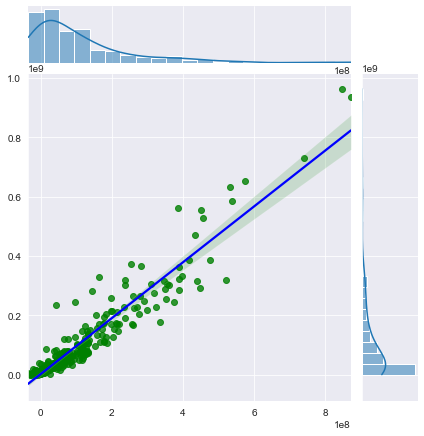

In [153]:
g=sns.jointplot(x=y_predict,y=np.array(y_test), kind='reg',
            joint_kws={'color':'green'} )
regline = g.ax_joint.get_lines()[0]
regline.set_color('blue')
regline.set_zorder(5)

# SVM Regression

In [154]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

In [155]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [156]:
y_predict = model.predict(X_train)
RMSE = sqrt(((y_train-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_train-y_predict)**2)
SS_Total = sum((y_train-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

print('R^2=',r_squared)
print('RMSE=',RMSE)

R^2= 0.8750633942559991
RMSE= 54776631.14006002


In [157]:
model.fit(X_train, y_train)

y_predict = model.predict(X_val)
RMSE = sqrt(((y_val-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_val-y_predict)**2)
SS_Total = sum((y_val-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total



results.loc[2]=["Random Forest Regression for val",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021

In [158]:
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
RMSE = sqrt(((y_test-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_test-y_predict)**2)
SS_Total = sum((y_test-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total



results.loc[3]=["Random Forest Regression for test data",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235

# K Neighbors Regressor

In [159]:
from sklearn.neighbors import KNeighborsRegressor


import sklearn as sk
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

model = KNeighborsRegressor(n_neighbors=10)

model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

In [160]:
model.score(X_train, y_train)

0.8992829991179281

In [161]:

y_predict = model.predict(X_val)
RMSE = sqrt(((y_val-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_val-y_predict)**2)
SS_Total = sum((y_val-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total




results.loc[4]=["KNN all columns for val",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                  KNN all columns for val  6.652174e+07  1.239040e+18   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235  
4  1.119637e+19   0.889336

In [162]:
from sklearn.neighbors import KNeighborsRegressor


import sklearn as sk
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

model = KNeighborsRegressor(n_neighbors=10)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)
RMSE = sqrt(((y_test-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_test-y_predict)**2)
SS_Total = sum((y_test-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total




results.loc[5]=["KNN all columns for test",RMSE, SS_Residual,SS_Total,r_squared]

results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                  KNN all columns for val  6.652174e+07  1.239040e+18   
5                 KNN all columns for test  4.546873e+07  5.788736e+17   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235  
4  1.119637e+19   0.889336  
5  5.876806e+18   0.901499

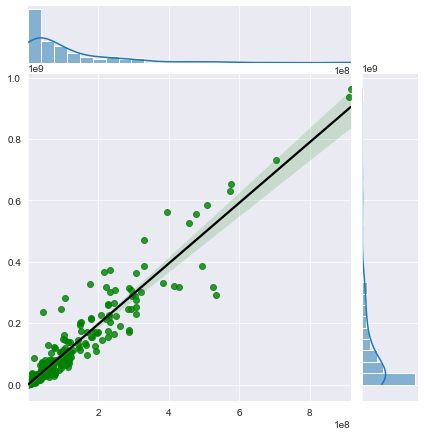

In [163]:
g=sns.jointplot(x=y_predict,y=np.array(y_test), kind='reg',
            joint_kws={'color':'green'} )
regline = g.ax_joint.get_lines()[0]
regline.set_color('black')
regline.set_zorder(5)

# Desicion Tree 

In [164]:
# Applying the one hot encoded data frame
from sklearn.linear_model import LinearRegression
import sklearn as sk
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
RMSE = sqrt(((y_test-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_test-y_predict)**2)
SS_Total = sum((y_test-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

results.loc[6]=["Decision Tree Regressor all columns",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                  KNN all columns for val  6.652174e+07  1.239040e+18   
5                 KNN all columns for test  4.546873e+07  5.788736e+17   
6      Decision Tree Regressor all columns  6.810579e+07  1.298752e+18   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235  
4  1.119637e+19   0.889336  
5  5.876806e+18   0.901499  
6  5.876806e+18   0.779004

In [165]:
import plotly.graph_objects as go
# Add data

fig = go.Figure()
# Create and style traces

fig.add_trace(go.Scatter(x=results['Method'], y=results['RMSE'], name='RMSE')),
fig.add_trace(go.Scatter(x=results['Method'], y=results['r_squared'], name='r_squared'))
# Edit the layout
fig.update_layout(title='Compare Regression Between Models',
                   xaxis_title='Models',
                   yaxis_title='Degree of Metrics')


fig.show()

# Try Polynomial Fit

In [166]:

degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

est.fit(X_train, y_train)

est.score(X_train, y_train)

0.9231761047195515

In [167]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
degree=2
model.fit(X_train, y_train)

y_predict = model.predict(X_val)
RMSE = sqrt(((y_val-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_val-y_predict)**2)
SS_Total = sum((y_val-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total




results.loc[7]=["Polynomial for val",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                  KNN all columns for val  6.652174e+07  1.239040e+18   
5                 KNN all columns for test  4.546873e+07  5.788736e+17   
6      Decision Tree Regressor all columns  6.810579e+07  1.298752e+18   
7                       Polynomial for val  7.148166e+07  1.430696e+18   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235  
4  1.119637e+19   0.889336  
5  5.876806e+18   0.901499  
6  5.876806e+18   0.779004  
7  1.119637e+19   0.872218

In [168]:
y_predict = est.predict(X_test)
RMSE = sqrt(((y_test-y_predict)**2).values.mean())
#R squared and adjusted R squared for train set
SS_Residual = sum((y_test-y_predict)**2)
SS_Total = sum((y_test-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total


results.loc[8]=["Polynomial test data",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                  KNN all columns for val  6.652174e+07  1.239040e+18   
5                 KNN all columns for test  4.546873e+07  5.788736e+17   
6      Decision Tree Regressor all columns  6.810579e+07  1.298752e+18   
7                       Polynomial for val  7.148166e+07  1.430696e+18   
8                     Polynomial test data  4.909800e+07  6.749719e+17   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235  
4  1.119637e+19   0.889336  
5  5.876806e+18   0.901499  
6  5.876806e+18   0.779004  
7  1.119637e+19   0.872218  
8  5.876806e+18   0.885146

In [169]:

degree = 2
est = make_pipeline(PolynomialFeatures(degree), KNeighborsRegressor())

est.fit(X_train, y_train)

est.score(X_train, y_train)

0.9152011887683521

In [170]:
model = make_pipeline(PolynomialFeatures(degree), KNeighborsRegressor())
degree=2
model.fit(X_train, y_train)

y_predict = model.predict(X_val)
RMSE = sqrt(((y_val-y_predict)**2).values.mean())

#R squared and adjusted R squared for train set
SS_Residual = sum((y_val-y_predict)**2)
SS_Total = sum((y_val-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total




results.loc[9]=["Polynomial with knn for val",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0  Linear Regression with validation data   6.063984e+07  1.029613e+18   
1         Linear Regression with test data  4.686588e+07  6.149949e+17   
2         Random Forest Regression for val  7.998174e+07  1.791182e+18   
3   Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                  KNN all columns for val  6.652174e+07  1.239040e+18   
5                 KNN all columns for test  4.546873e+07  5.788736e+17   
6      Decision Tree Regressor all columns  6.810579e+07  1.298752e+18   
7                       Polynomial for val  7.148166e+07  1.430696e+18   
8                     Polynomial test data  4.909800e+07  6.749719e+17   
9              Polynomial with knn for val  6.723120e+07  1.265610e+18   

       SS_Total  r_squared  
0  1.119637e+19   0.908040  
1  5.876806e+18   0.895352  
2  1.119637e+19   0.840021  
3  5.876806e+18   0.827235  
4  1.119637e+19   0.889336  
5  5.876806e+18   0.901499  
6  5.876806e+18   0.779004  
7  1.119637e+19   0.872218  
8  5.876806e+18   0.885146  
9  1.119637e+19   0.886962

In [171]:
y_predict = est.predict(X_test)
RMSE = sqrt(((y_test-y_predict)**2).values.mean())
#R squared and adjusted R squared for train set
SS_Residual = sum((y_test-y_predict)**2)
SS_Total = sum((y_test-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total


results.loc[10]=["Polynomial with knn test data",RMSE, SS_Residual,SS_Total,r_squared]
results

Method          RMSE   SS_Residual  \
0   Linear Regression with validation data   6.063984e+07  1.029613e+18   
1          Linear Regression with test data  4.686588e+07  6.149949e+17   
2          Random Forest Regression for val  7.998174e+07  1.791182e+18   
3    Random Forest Regression for test data  6.021698e+07  1.015304e+18   
4                   KNN all columns for val  6.652174e+07  1.239040e+18   
5                  KNN all columns for test  4.546873e+07  5.788736e+17   
6       Decision Tree Regressor all columns  6.810579e+07  1.298752e+18   
7                        Polynomial for val  7.148166e+07  1.430696e+18   
8                      Polynomial test data  4.909800e+07  6.749719e+17   
9               Polynomial with knn for val  6.723120e+07  1.265610e+18   
10            Polynomial with knn test data  5.173679e+07  7.494747e+17   

        SS_Total  r_squared  
0   1.119637e+19   0.908040  
1   5.876806e+18   0.895352  
2   1.119637e+19   0.840021  
3   5.876806e+18   0.827235  
4   1.119637e+19   0.889336  
5   5.876806e+18   0.901499  
6   5.876806e+18   0.779004  
7   1.119637e+19   0.872218  
8   5.876806e+18   0.885146  
9   1.119637e+19   0.886962  
10  5.876806e+18   0.872469

# so our best model is KNN

<AxesSubplot:ylabel='Worldwide_Revenue'>

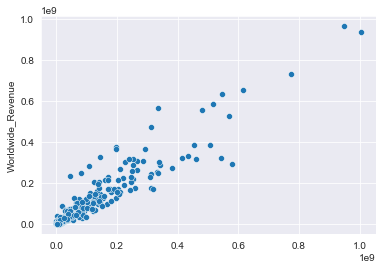

In [172]:
sns.scatterplot(y_predict, y_test)

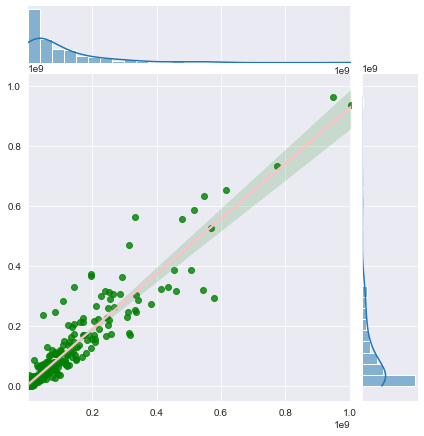

In [173]:
g=sns.jointplot(x=y_predict,y=np.array(y_test), kind='reg',
            joint_kws={'color':'green'} )
regline = g.ax_joint.get_lines()[0]
regline.set_color('pink')
regline.set_zorder(5)

# Other Mothed Cross Validation 

In [174]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)

In [175]:
# Notice that we are splitting the X_train data into 5 Folds

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [176]:
# Applying the one hot encoded data frame
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [177]:
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
model.fit(X_train, y_train)

[0.87383865 0.91701706 0.90359833 0.89954557 0.89710439]
Linear Reg Mean Score:  0.8982207997266258


LinearRegression()

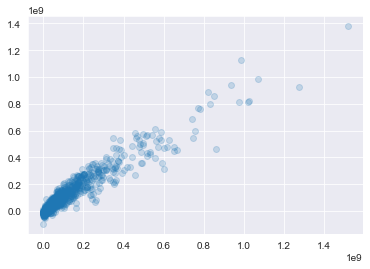

In [178]:
# Fitted vs. Actual
y_train_pred = (model.predict(X_train))

plt.scatter(y_train, y_train_pred , alpha=0.2)
plt.plot([0, 400], [0, 400])

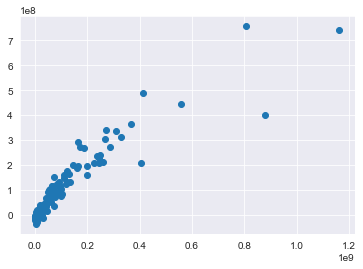

In [179]:
# Fitted vs. Actual
y_test_pred = model.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([0, 400], [0, 400])

Text(0.5, 1.0, 'Residuals vs. Predictions')

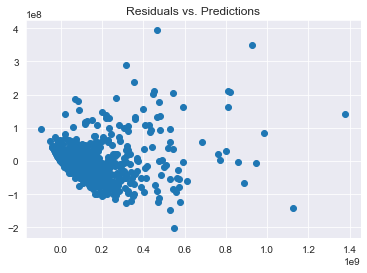

In [180]:
# Plot Residuals vs. predicted

model = y_train - y_train_pred

plt.scatter(y_train_pred, model)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")

In [182]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Lasso Grid Search


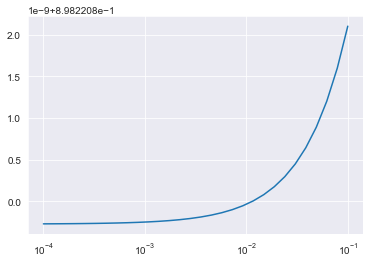

In [183]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))

In [184]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

Lasso Regression: 0.9009761561108334


## Extra data for tablue 

In [185]:
## read a data set gieven by IMBD
imdb_movie = pd.read_csv('imbd-move.csv') 

In [186]:
imdb_movie

Title                  original_title  year  \
0                          Miss Jerry                      Miss Jerry  1894   
1         The Story of the Kelly Gang     The Story of the Kelly Gang  1906   
2                      Den sorte drøm                  Den sorte drøm  1911   
3                           Cleopatra                       Cleopatra  1912   
4                           L'Inferno                       L'Inferno  1911   
...                               ...                             ...   ...   
85850                         Le lion                         Le lion  2020   
85851  De Beentjes van Sint-Hildegard  De Beentjes van Sint-Hildegard  2020   
85852       Padmavyuhathile Abhimanyu       Padmavyuhathile Abhimanyu  2019   
85853               Sokagin Çocuklari               Sokagin Çocuklari  2019   
85854      La vida sense la Sara Amat      La vida sense la Sara Amat  2019   

      date_published                      genre  duration           country  \
0         1894-10-09                    Romance        45               USA   
1         12/26/1906    Biography, Crime, Drama        70         Australia   
2          8/19/1911                      Drama        53  Germany, Denmark   
3         11/13/1912             Drama, History       100               USA   
4           3/6/1911  Adventure, Drama, Fantasy        68             Italy   
...              ...                        ...       ...               ...   
85850      1/29/2020                     Comedy        95   France, Belgium   
85851      2/13/2020              Comedy, Drama       103       Netherlands   
85852       3/8/2019                      Drama       130             India   
85853      3/15/2019              Drama, Family        98            Turkey   
85854       2/5/2020                      Drama        74             Spain   

            language                             director  \
0               None                      Alexander Black   
1               None                         Charles Tait   
2                NaN                            Urban Gad   
3            English                   Charles L. Gaskill   
4            Italian  Francesco Bertolini, Adolfo Padovan   
...              ...                                  ...   
85850         French               Ludovic Colbeau-Justin   
85851  German, Dutch                      Johan Nijenhuis   
85852      Malayalam                      Vineesh Aaradya   
85853        Turkish                    Ahmet Faik Akinci   
85854        Catalan                            Laura Jou   

                                      writer  ...  \
0                            Alexander Black  ...   
1                               Charles Tait  ...   
2      Urban Gad, Gebhard Schätzler-Perasini  ...   
3                           Victorien Sardou  ...   
4                            Dante Alighieri  ...   
...                                      ...  ...   
85850  Alexandre Coquelle, Matthieu Le Naour  ...   
85851           Radek Bajgar, Herman Finkers  ...   
85852       Vineesh Aaradya, Vineesh Aaradya  ...   
85853         Ahmet Faik Akinci, Kasim Uçkan  ...   
85854                   Coral Cruz, Pep Puig  ...   

                                                  actors  \
0      Blanche Bayliss, William Courtenay, Chauncey D...   
1      Elizabeth Tait, John Tait, Norman Campbell, Be...   
2      Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3      Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4      Salvatore Papa, Arturo Pirovano, Giuseppe de L...   
...                                                  ...   
85850  Dany Boon, Philippe Katerine, Anne Serra, Samu...   
85851  Herman Finkers, Johanna ter Steege, Leonie ter...   
85852  Anoop Chandran, Indrans, Sona Nair, Simon Brit...   
85853  Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...   
85854  Maria Morera Colomer, Biel Rossell Pelfort, Is...   

                                           

In [187]:

imdb_movie.columns = imdb_movie.columns.str.strip()
imdb_movie.columns

Index(['Title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [188]:
imdb_movie['Title'] = imdb_movie['Title'].str.upper()

In [189]:
tableau_data=imdb_data2.merge(imdb_movie, on='Title')

In [190]:
tableau_data.to_csv('tableau_data.csv')